**Auto Theft Discovery Assignment**

Juan Consuegra and Student ID: 100731286

Auto theft on the rise in the GTA, as someone of values my security of my property, the sudden surge in auto thefts have let me wanting to discover what can I do to avoid being the next target and  help vehicle owners with the knowledge to protect their properties, ***so how can someone make themselves less vulnerable to criminals searching for vehicles?*** With the data collected within the last 9 years, I want to unravel the patterens, areas where this likely to occur so you won't have be the next person to notice their car is missing.

https://data.torontopolice.on.ca/datasets/TorontoPS::auto-theft-open-data/explore?location=17.409929%2C-11.824235%2C2.33&showTable=true

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

fileName = 'Auto_Theft_Open_Data.csv'
auto_theft = pd.read_csv(fileName);

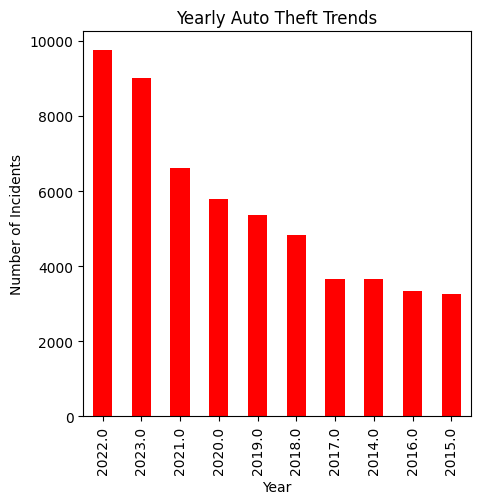

In [ ]:
#the occurrence the crime was commited related to auto theft



df = pd.DataFrame(auto_theft)
#occ_year= np.array(auto_theft['OCC_YEAR'] )
year = df['OCC_YEAR'].value_counts()
yearly_trends = year.nlargest(10).plot(kind='bar', figsize=(5,5), color='red')
yearly_trends.set_xlabel('Year')
yearly_trends.set_ylabel('Number of Incidents')
yearly_trends.set_title('Yearly Auto Theft Trends')
plt.show()

In the graph we can see the rise in auto theft crime, comparing the years 2014 & 2015 to the year 2023 we can see it has more than double.

In [ ]:
# Here I'm removing columns which are not going to be used for this assignment
df.drop(['HOOD_158', 'HOOD_140', 'X', 'Y', 'LONG_WGS84', 'LAT_WGS84', 'UCR_EXT', 'DIVISION','EVENT_UNIQUE_ID','UCR_CODE','REPORT_DOY'], axis=1).head()

,OBJECTID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,NEIGHBOURHOOD_140
0,1,2014/01/01 05:00:00+00,2013/12/31 05:00:00+00,2014,January,1,Wednesday,16,2013.0,December,31.0,365.0,Tuesday,17,"Apartment (Rooming House, Condo)",Apartment,Theft Of Motor Vehicle,Auto Theft,Victoria Village,Victoria Village (43)
1,2,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,Wednesday,15,2014.0,January,1.0,1.0,Wednesday,15,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,Cliffcrest,Cliffcrest (123)
2,3,2014/01/01 05:00:00+00,2013/12/25 05:00:00+00,2014,January,1,Wednesday,15,2013.0,December,25.0,359.0,Wednesday,0,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,Etobicoke City Centre,Islington-City Centre West (14)
3,4,2014/01/02 05:00:00+00,2014/01/01 05:00:00+00,2014,January,2,Thursday,8,2014.0,January,1.0,1.0,Wednesday,15,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,Mount Olive-Silverstone-Jamestown,Mount Olive-Silverstone-Jamestown (2)
4,5,2014/01/02 05:00:00+00,2014/01/01 05:00:00+00,2014,January,2,Thursday,7,2014.0,January,1.0,1.0,Wednesday,19,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,Edenbridge-Humber Valley,Edenbridge-Humber Valley (9)


In [ ]:
neighbourhood_counts = auto_theft.groupby('NEIGHBOURHOOD_158').size().reset_index(name='Total Incidents')
#print(neighbourhood_counts)

[Text(-1.0, 0, 'Yorkdale-Glen Park'),
 Text(0.0, 0, 'West Humber-Clairville'),
 Text(1.0, 0, 'York University Heights'),
 Text(2.0, 0, 'Etobicoke City Centre'),
 Text(3.0, 0, 'Humber Summit'),
 Text(4.0, 0, 'Milliken'),
 Text(5.0, 0, 'Oakdale-Beverley Heights'),
 Text(6.0, 0, 'Yorkdale-Glen Park'),
 Text(7.0, 0, '')]

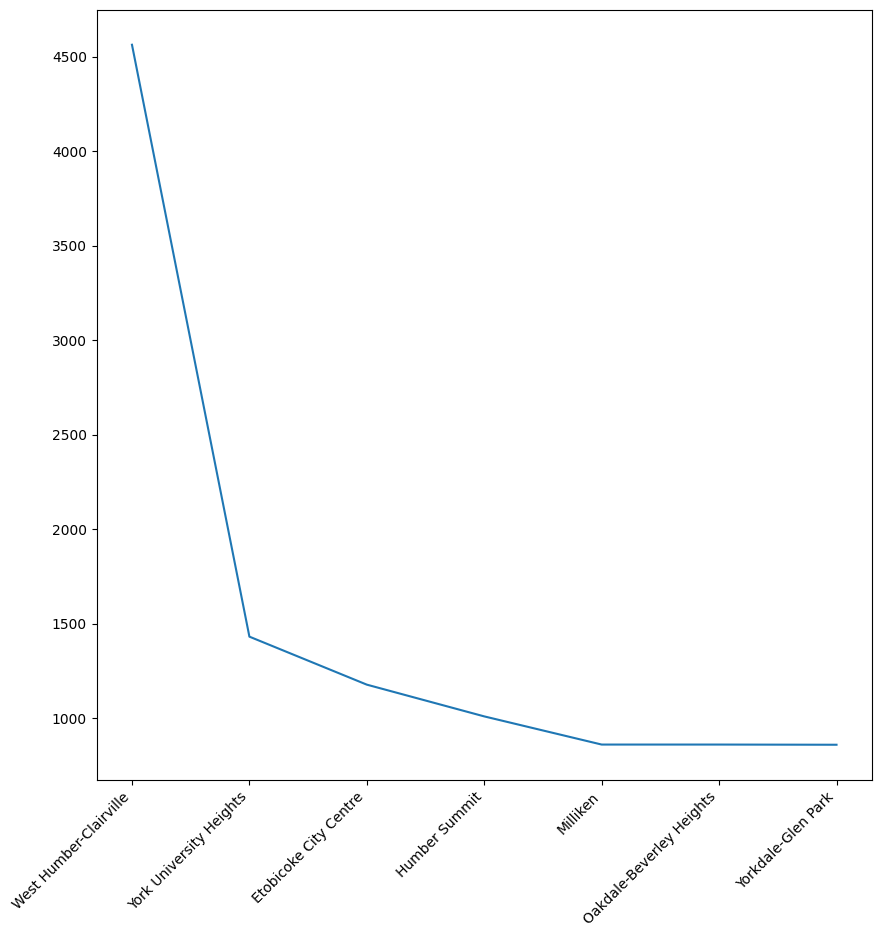

In [ ]:
neighbourhoods = df['NEIGHBOURHOOD_158'].value_counts()
at_risk_neighbourhood = neighbourhoods.nlargest(7).plot(kind='line', figsize=(10, 10))
at_risk_neighbourhood.set_xticklabels(at_risk_neighbourhood.get_xticklabels(), rotation=45, ha='right')

Here we can see which neighbourhoods are most at risk in the the Toronto district.

and next I'll be showing which months are the one where most of the cars are stolen.

In [ ]:
#reported_month_array = np.array(auto_theft['REPORT_MONTH'], dtype = 'U3')
#location_typeStole2 = np.array(auto_theft['LOCATION_TYPE'], dtype='U2')

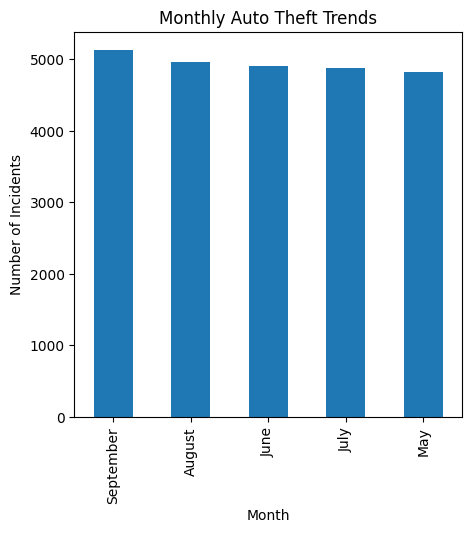

In [ ]:
#reported_month_array = np.array(auto_theft['REPORT_MONTH'], dtype = 'U3')

REPORT_HOUR = df['REPORT_MONTH'].value_counts()
monthly_trends = REPORT_HOUR.nlargest(5).plot(kind='bar', figsize=(5,5))
monthly_trends.set_xlabel('Month')
monthly_trends.set_ylabel('Number of Incidents')
monthly_trends.set_title('Monthly Auto Theft Trends')
plt.show()

In the graph above we see the peak 5 months where auto theft is likely to occur

In [ ]:
premise_counts = df['PREMISES_TYPE'].value_counts()
print(premise_counts)

Outside        29232
House          17707
Commercial      4991
Other           1627
Apartment       1549
Transit          166
Educational       66
Name: PREMISES_TYPE, dtype: int64


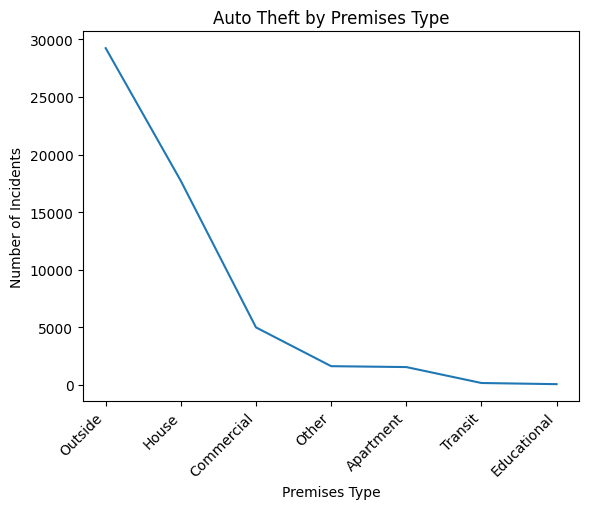

In [ ]:
premise_graph = premise_counts.nlargest(7).plot(kind='line')
premise_graph.set_xticklabels(premise_graph.get_xticklabels(), rotation=45, ha='right')
premise_graph.set_xlabel('Premises Type')
premise_graph.set_ylabel('Number of Incidents')
premise_graph.set_title('Auto Theft by Premises Type')
plt.show()

In [ ]:
#location_typeStole2 = np.array(auto_theft['LOCATION_TYPE'], dtype='U2')
#plt.hist(reported_month_array)
#plt.title("Months displaying amount of cars stolen")
#plt.xlabel("Months")
#plt.ylabel("Amount Reported")

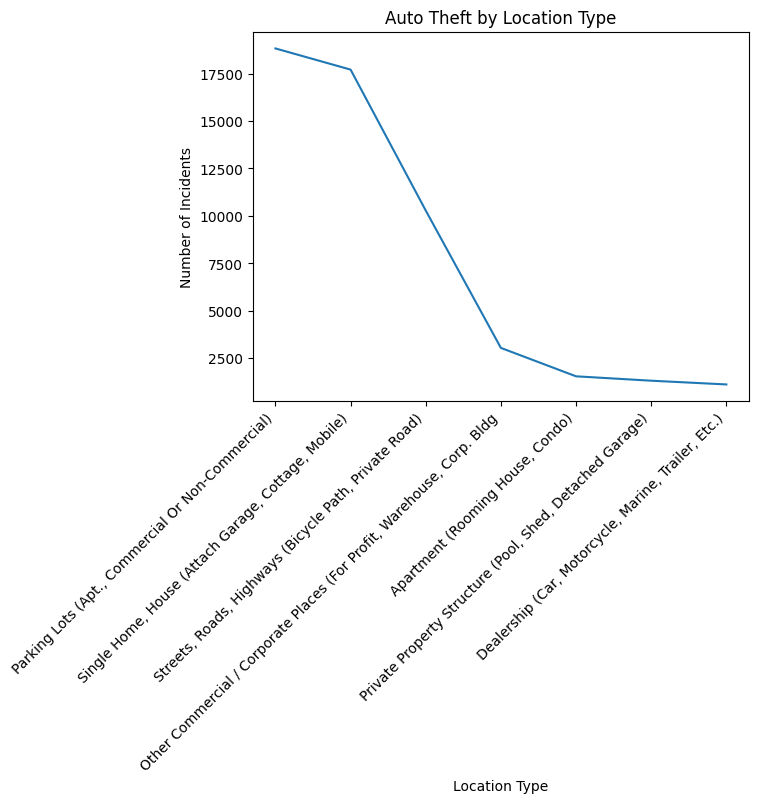

In [ ]:
loc_counts = df['LOCATION_TYPE'].value_counts()

loc_type_graph = loc_counts.nlargest(7).plot(kind='line')
loc_type_graph.set_xticklabels(loc_type_graph.get_xticklabels(), rotation=45, ha='right', )
loc_type_graph.set_xlabel('Location Type')
loc_type_graph.set_ylabel('Number of Incidents')
loc_type_graph.set_title('Auto Theft by Location Type')
plt.show()

Here we encounter the types of location where auto theft is likely to occur

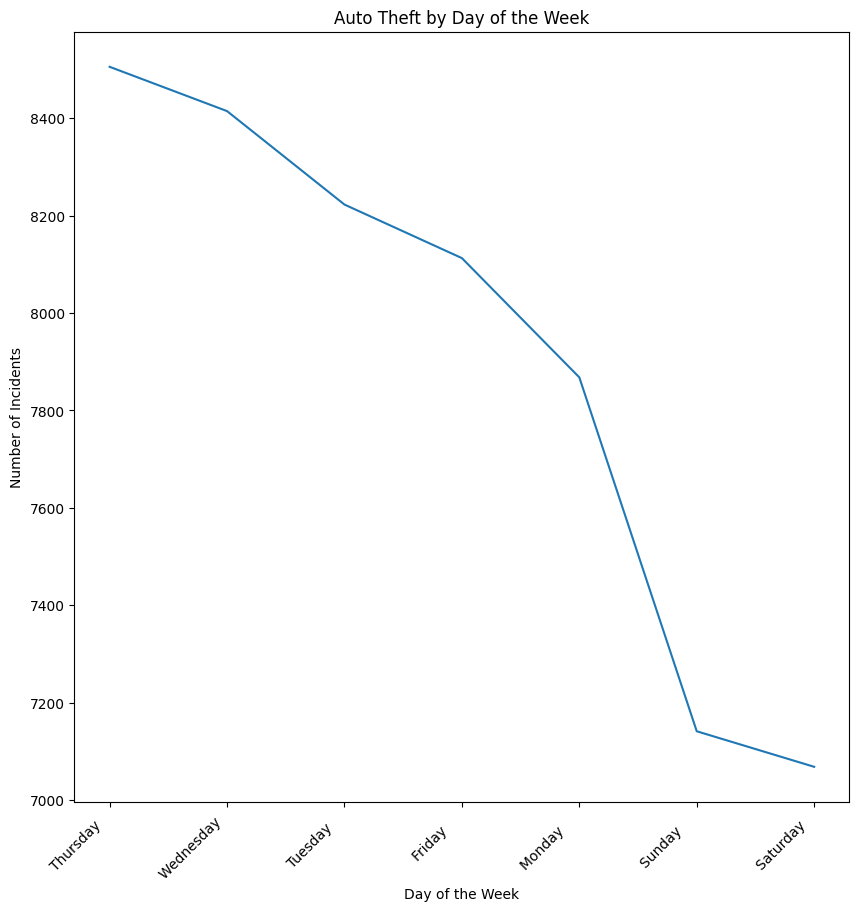

In [ ]:
# Day of the week where a theft is most likely to occur
occ_dow = df['OCC_DOW'].value_counts()


occ_dow_graph = occ_dow.nlargest(7).plot(kind='line', figsize=(10, 10))
occ_dow_graph.set_xticklabels(occ_dow_graph.get_xticklabels(), rotation=45, ha='right')
occ_dow_graph.set_xlabel('Day of the Week')
occ_dow_graph.set_ylabel('Number of Incidents')
occ_dow_graph.set_title('Auto Theft by Day of the Week')
plt.show()


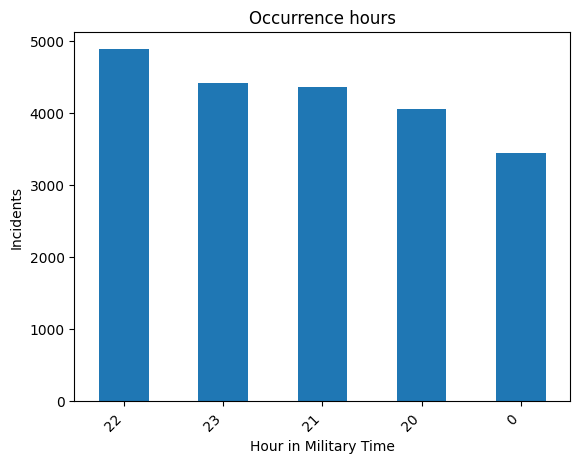

In [ ]:
REPORT_HOUR = df['OCC_HOUR'].value_counts()
REPORT_HOUR_graph = REPORT_HOUR.nlargest(5).plot(kind='bar' )
REPORT_HOUR_graph.set_xticklabels(REPORT_HOUR_graph.get_xticklabels(), rotation=45, ha='right')
REPORT_HOUR_graph.set_xlabel('Hour in Military Time')
REPORT_HOUR_graph.set_ylabel('Incidents')
REPORT_HOUR_graph.set_title("Occurrence hours")
plt.show()

Peak hours were the auto theft crimes are likely to occur

This data illustrates significant patterns in auto theft in the Toronto district, highlighting the importance of staying vigilant. Based on the analysis of historical data we can see the most at risk neighbourhoods, specific months and hours that are associated with higher occurrences of auto theft, and where auto theft is most likely to occur as well.



As the data illustrates West Humber-Clairville, York University Heights, Etobicoke City Centre neighbourhoods residents or anyone visiting should be attentive to securing their vehicle as it known to be a high risk area with having the most amount of auto theft occurrences.

The data has also revealed the specific months and hour where these crimes tend to mostly occur the months being September, August, June, July, May. Understanding where it'd likey occur is important as well in our premise graph we can see it tends usually be outside mainly in Parking Lots (Apt., Commercial Or Non-Commercial)
Single Home, House (Attach Garage, Cottage, Mobile)
Streets, Roads, Highways (Bicycle Path, Private Road) as shown in the loc_type_graph

Certain days of the week are more prone to auto theft, the data suggesting a higher risk during specific weekdays such as Thursday, Wednesday, Tuesday and Friday and taking a look at reported hours it indicates the peak times are from 8pm to 12am.


 Analysis of the data in Toronto provides a understanding of the factors influencing the vulnerability of people to these crimes. A different approach to vehicle security is a must specially with the high rise of in these areas and peak month/time, incorporating security measures  during high-risk periods is a must to significantly reduce their susceptibility to auto theft.

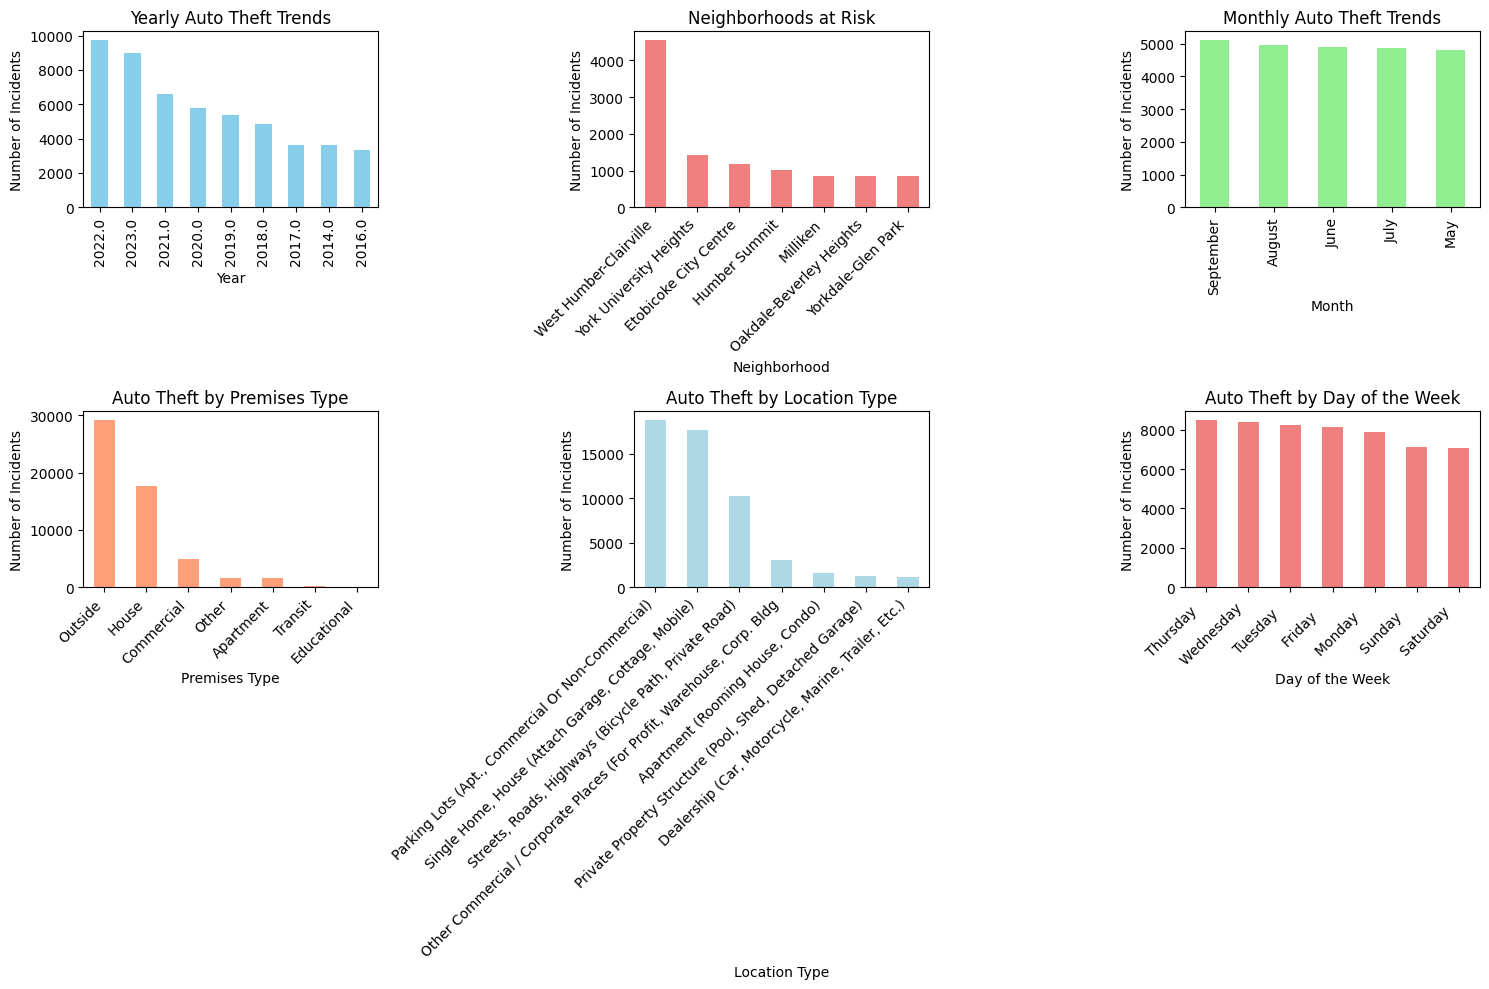

In [ ]:
#Here we'll summarize the graphs and combine them
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
value_counts = auto_theft['OCC_YEAR'].value_counts()
yearly_trends = value_counts.sort_index().nlargest(9).plot(kind='bar', color='skyblue')
yearly_trends.set_xlabel('Year')
yearly_trends.set_ylabel('Number of Incidents')
yearly_trends.set_title('Yearly Auto Theft Trends')

plt.subplot(2, 3, 2)
neighbourhoods = auto_theft['NEIGHBOURHOOD_158'].value_counts().nlargest(7)
at_risk_neighbourhood = neighbourhoods.plot(kind='bar', color='lightcoral')
at_risk_neighbourhood.set_xticklabels(at_risk_neighbourhood.get_xticklabels(), rotation=45, ha='right')
at_risk_neighbourhood.set_xlabel('Neighborhood')
at_risk_neighbourhood.set_ylabel('Number of Incidents')
at_risk_neighbourhood.set_title('Neighborhoods at Risk')

plt.subplot(2, 3, 3)
monthly_trends = auto_theft['REPORT_MONTH'].value_counts().nlargest(5).plot(kind='bar', color='lightgreen')
monthly_trends.set_xlabel('Month')
monthly_trends.set_ylabel('Number of Incidents')
monthly_trends.set_title('Monthly Auto Theft Trends')

plt.subplot(2, 3, 4)
premise_counts = auto_theft['PREMISES_TYPE'].value_counts().nlargest(7)
premise_graph = premise_counts.plot(kind='bar', color='lightsalmon')
premise_graph.set_xticklabels(premise_graph.get_xticklabels(), rotation=45, ha='right')
premise_graph.set_xlabel('Premises Type')
premise_graph.set_ylabel('Number of Incidents')
premise_graph.set_title('Auto Theft by Premises Type')

plt.subplot(2, 3, 5)
loc_counts = auto_theft['LOCATION_TYPE'].value_counts().nlargest(7)
loc_type_graph = loc_counts.plot(kind='bar', color='lightblue')
loc_type_graph.set_xticklabels(loc_type_graph.get_xticklabels(), rotation=45, ha='right')
loc_type_graph.set_xlabel('Location Type')
loc_type_graph.set_ylabel('Number of Incidents')
loc_type_graph.set_title('Auto Theft by Location Type')

plt.subplot(2, 3, 6)
occ_dow = auto_theft['OCC_DOW'].value_counts().nlargest(7)
occ_dow_graph = occ_dow.plot(kind='bar', color='lightcoral')
occ_dow_graph.set_xticklabels(occ_dow_graph.get_xticklabels(), rotation=45, ha='right')
occ_dow_graph.set_xlabel('Day of the Week')
occ_dow_graph.set_ylabel('Number of Incidents')
occ_dow_graph.set_title('Auto Theft by Day of the Week')


plt.tight_layout()
plt.show()

Conclusion Mitigating Auto Theft :
After analysis the data over the past nine years, while navigating throughout Toronto avoiding high risk areas/neighbourhoods such as such as West Humber-Clairville, York University Heights, and Etobicoke City Centre, being aware is a must since these share a higher occurrences. Timing is crucial as well since crimes tend to peak within a specific time frame, from 8pm - 12am people should take extra precautions to significantly reduce their vulnerablitity as shown during the warmer months such as May, June, July, September people should consider their plans outside of this time frame for insuring your vechile is not stolen and if you are resident in these neighbourhoods the best measure can be not leaving your vehicle outside as seen on the premise graph the data suggest that keeping your vehicles indoors especially throught the weekdays can significantly reduce your chance of having your vehicle stolen. These measures can decrease possiblity of anyone having their vehicle stolen anywhwere since it is occurring all around the GTA, staying vigilant to protect your property and always staying informed will always be the best measure to prevent.